In [1]:
import pandas as pd
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
import matplotlib

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Load the data
path = 'data/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/'
data = {f: pd.read_csv(path + f + '.csv') for f in ['campaign_desc', 'campaign_table',
                                                    'causal_data', 'coupon', 'coupon_redempt',
                                                    'hh_demographic', 'product',
                                                    'transaction_data']}

In [3]:
dem_trans = pd.merge(data['hh_demographic'], data['transaction_data'], on='household_key')

In [4]:
dem_trans.columns

Index(['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC'],
      dtype='object')

                        DAY
household_key AGE_DESC     
1             65+        79
7             45-54      59
8             25-34     103
13            25-34     203
16            45-54      90


Text(0.5, 1.0, 'Number of different days people of different ages went shopping in the study period')

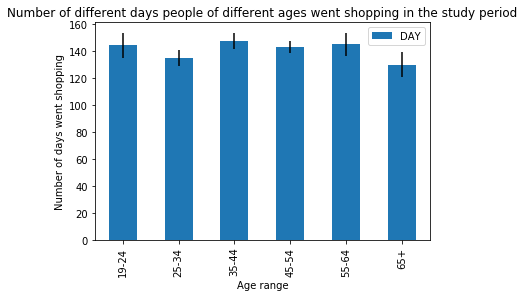

In [65]:
by_age = dem_trans.groupby(['household_key', 'AGE_DESC']).agg({'DAY': 'nunique'})
y = by_age.groupby('AGE_DESC')
y.mean().plot.bar(yerr=y.sem())
plt.xlabel('Age range')
plt.ylabel('Number of days went shopping')
plt.title('Number of different days people of different ages went shopping in the study period')

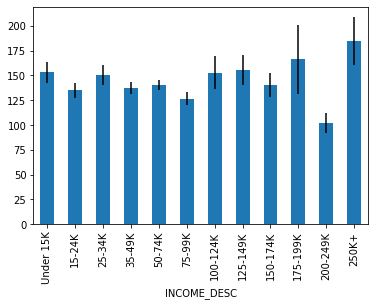

In [111]:
categories = ['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K',
              '125-149K', '150-174K', '175-199K', '200-249K', '250K+']

mapping = {income: i for i, income in enumerate(categories)}
by_income = dem_trans.groupby(['household_key', 'INCOME_DESC'], as_index=False).agg({'DAY': 'nunique'})
group = by_income.groupby('INCOME_DESC', as_index=False)
key = group.mean().INCOME_DESC.map(mapping)

group.mean().set_index('INCOME_DESC').iloc[key.argsort()].DAY.plot.bar(yerr=group.agg({'DAY': 'sem'}).set_index('INCOME_DESC').iloc[key.argsort()].DAY)
plt.xlabel('Income range')
plt.ylabel('Number of days went shopping')
plt.title('Number of different days people with different incomes went shopping in the study period')

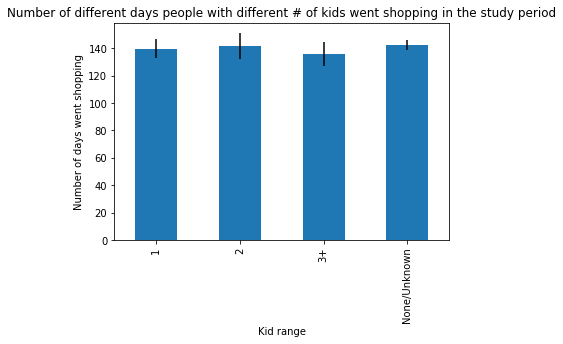

In [117]:
by_kids = dem_trans.groupby(['household_key', 'KID_CATEGORY_DESC']).agg({'DAY': 'nunique'})
y = by_kids.groupby('KID_CATEGORY_DESC')
y.mean().plot.bar(yerr=y.sem())
plt.xlabel('Kid range')
plt.ylabel('Number of days went shopping')
plt.title('Number of different days people with different # of kids went shopping in the study period')
plt.legend().remove()

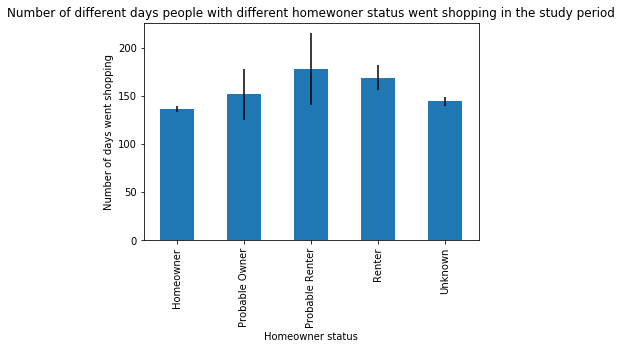

In [124]:
by_ho = dem_trans.groupby(['household_key', 'HOMEOWNER_DESC']).agg({'DAY': 'nunique'})
y = by_ho.groupby('HOMEOWNER_DESC')
y.mean().plot.bar(yerr=y.sem())
plt.xlabel('Homeowner status')
plt.ylabel('Number of days went shopping')
plt.title('Number of different days people with different homewoner status went shopping in the study period')
plt.legend().remove()

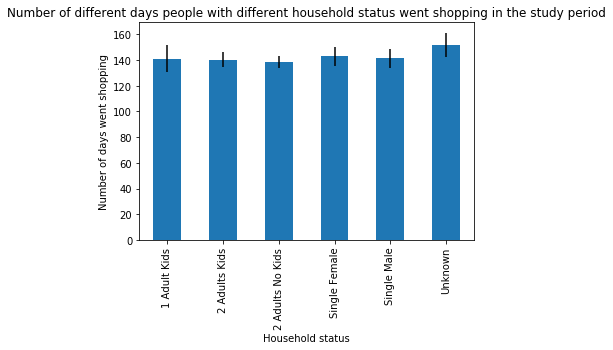

In [125]:
by_hh = dem_trans.groupby(['household_key', 'HH_COMP_DESC']).agg({'DAY': 'nunique'})
y = by_hh.groupby('HH_COMP_DESC')
y.mean().plot.bar(yerr=y.sem())
plt.xlabel('Household status')
plt.ylabel('Number of days went shopping')
plt.title('Number of different days people with different household status went shopping in the study period')
plt.legend().remove()